In [2]:
from qpe import *
from numpy import log

from time import time

from numpy.random import randint

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rc('text', usetex=True)

# $z$-rotation of $\vert + \rangle$

In [29]:
""" one copy """

def H_uni_1(k):
    return pi/2*I - (4*k)/(pi + k*pi)*X

def rho_uni_1(a):
    return 1/2*(I + cos(a)*X + sin(a)*Y)

def rho_uni_der_1(a):
    return np.array([[0,              -1j*exp(-1j*a)/2],
                     [1j*exp(1j*a)/2,                0]])

In [30]:
""" two copies """

def H_uni_2(k, h11=0):
    h00 = -h11 + pi / 2
    h01 = -((12 * (8 * k * pi + k**2 * pi)) / ((1 + 2 * k) * (-32 - 64 * k + 27 * pi**2 + 9 * k * pi**2)))
    h02 = 0
    h03 = 0
    h10 = h01
    h12 = -((3 * (-32 * k + 3 * k * pi**2)) / (-32 - 64 * k + 27 * pi**2 + 9 * k * pi**2))
    h13 = 0
    h20 = 0
    h21 = h12
    h22 = h11
    h23 = 0
    h30 = 0
    h31 = 0
    h32 = 0
    h33 = h11
    H = (
        h00 * np.kron(I, I) + h01 * np.kron(I, X) + h02 * np.kron(I, Y) + h03 * np.kron(I, Z) +
        h10 * np.kron(X, I) + h11 * np.kron(X, X) + h12 * np.kron(X, Y) + h13 * np.kron(X, Z) +
        h20 * np.kron(Y, I) + h21 * np.kron(Y, X) + h22 * np.kron(Y, Y) + h23 * np.kron(Y, Z) +
        h30 * np.kron(Z, I) + h31 * np.kron(Z, X) + h32 * np.kron(Z, Y) + h33 * np.kron(Z, Z)
        )
    return H

def rho_uni_2(a):
    rho_uni = 1/2*(I + cos(a)*X + sin(a)*Y)
    return np.kron(rho_uni, rho_uni)

def rho_uni_der_2(a):
    return array([[                 0, -1/4*1j*exp(-1j*a), -1/4*1j*exp(-1j*a), -1/2*1j*exp(-2*1j*a)],
                  [  1/4*1j*exp(1j*a),                  0,                  0, -1/4*1j*exp(-1j*a)],
                  [  1/4*1j*exp(1j*a),                  0,                  0, -1/4*1j*exp(-1j*a)],
                  [1/2*1j*exp(2*1j*a),   1/4*1j*exp(1j*a),   1/4*1j*exp(1j*a),                  0]])

In [31]:
k = 1e4

a = 0
b = pi
eps = 1e-5
T = 101
labels = linspace(a + eps, b - eps, T)

dms_1 = [rho_uni_1(a) for a in labels]
dms_2 = [rho_uni_2(a) for a in labels]
dms_der_1 = [rho_uni_der_1(a) for a in labels]
dms_der_2 = [rho_uni_der_2(a) for a in labels]

H_1 = H_uni_1(k)
H_2 = H_uni_2(k)

expecs_1 = array([trace(dm_1@H_1).real for dm_1 in dms_1])
expecs_2 = array([trace(dm_2@H_2).real for dm_2 in dms_2])

expecs_der_1 = array([trace(dm_der_1@H_1).real for dm_der_1 in dms_der_1])
expecs_der_2 = array([trace(dm_der_2@H_2).real for dm_der_2 in dms_der_2])

disps_1 = array([trace(dm_1@H_1@H_1).real for dm_1 in dms_1]) - expecs_1**2
disps_2 = array([trace(dm_2@H_2@H_2).real for dm_2 in dms_2]) - expecs_2**2

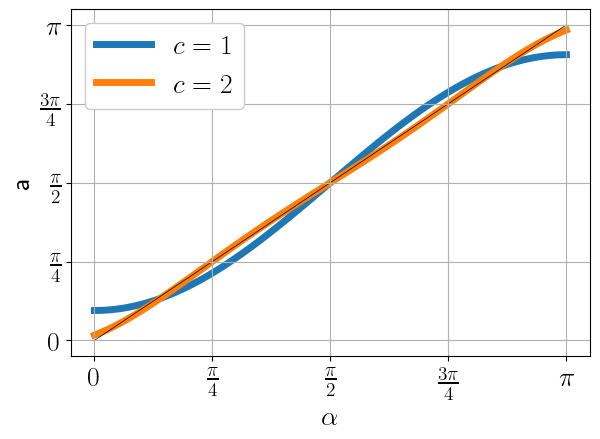

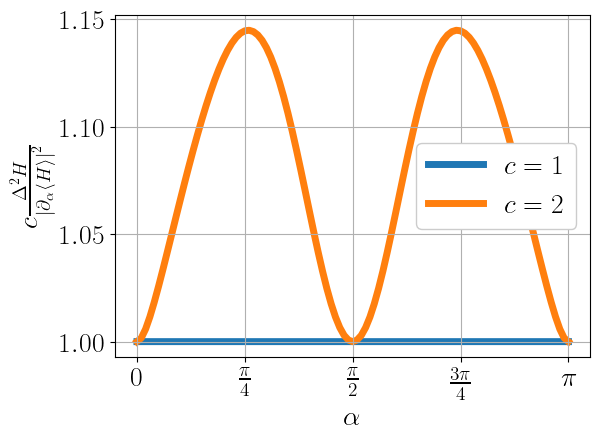

In [32]:
plt.plot(labels, expecs_1, linewidth=5, zorder=0, label=r"$c=1$")
plt.plot(labels, expecs_2, linewidth=5, zorder=0, label=r"$c=2$")
plt.plot(labels, labels, color="black", linewidth=0.5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathsf{a}$")
plt.xticks([0, pi/4, pi/2, 3*pi/4, pi], [r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
plt.yticks([0, pi/4, pi/2, 3*pi/4, pi], [r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
plt.grid()
plt.legend(framealpha=1)
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.plot(labels, disps_1/expecs_der_1**2, linewidth=5, zorder=0, label=r"$c=1$")
plt.plot(labels, 2*disps_2/expecs_der_2**2, linewidth=5, zorder=0, label=r"$c=2$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$c\frac{\Delta^2 H}{\left| \partial_\alpha \langle H \rangle \right|^2}$" )
plt.xticks([0, pi/4, pi/2, 3*pi/4, pi], [r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
# plt.yticks([0, pi/4, pi/2, 3*pi/4, pi], [r"$0$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
plt.grid()
plt.legend(framealpha=1)
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

# Amplitude-damping

## Input $\rho = \vert + \rangle\langle + \vert$

In [96]:
def h0(k, a, b):
    L = b - a
    c1 = (2/3)*((1 - a)**(3/2) - (1 - b)**(3/2))
    c2 = (1/2)*(b**2 - a**2)
    c3 = (2/5)*((1 - b)**(5/2) - (1 - a)**(5/2))
    c4 = (1/3)*(b**3 - a**3)
    numerator = (2*c2*((c1 + c3)**2 + c2*c4)*(k - 1) - 2*(c2**2 * (k - 1) + c1*(c1 + c3)*k + c2*c4*k)*L + 2*c2 * k * L**2)
    denominator = ((c2**3 + 2 * c1*c2*c3 + c1**2*(2*c2 - c4)) * (k - 1)*k - ((c1 + c3)**2 + c2*c4 - (c1**2 + 4*c1*c3 + 2*(c3**2 + c2*c4))*k + ((c1 + c3)**2 + c2*(c2 + c4))*k**2)*L + (k - 1)*(-c2 + c4*k)*L**2 + k*L**3)
    h0_expr = numerator / denominator
    return h0_expr

def h1(k, a, b):
    L = b - a
    c1 = (2/3)*((1 - a)**(3/2) - (1 - b)**(3/2))
    c2 = (1/2)*(b**2 - a**2)
    c3 = (2/5)*((1 - b)**(5/2) - (1 - a)**(5/2))
    c4 = (1/3)*(b**3 - a**3)
    numerator = (2*k*(c2*(-c2*(c1 + c3) + c1*c4) 
                          - c1*c2*L + (c1 + c3)*L**2))
    denominator = ((c2**3 + 2*c1*c2*c3 + c1**2 * (2*c2 - c4))*(k - 1)*k 
                   - ((c1 + c3)**2 + c2 * c4 
                      - (c1**2 + 4 * c1 * c3 + 2 * (c3**2 + c2*c4))*k 
                      + ((c1 + c3)**2 + c2*(c2 + c4))*k**2)*L 
                   + (k - 1) * (-c2 + c4*k) * L**2 
                   + k * L**3)
    h1_expr = numerator / denominator
    return h1_expr

def h3(k, a, b):
    L = b - a
    c1 = (2/3)*((1 - a)**(3/2) - (1 - b)**(3/2))
    c2 = (1/2)*(b**2 - a**2)
    c3 = (2/5)*((1 - b)**(5/2) - (1 - a)**(5/2))
    c4 = (1/3)*(b**3 - a**3)
    numerator = (2 * k * (c2**3 * (-1 + k) 
                          + (c3**2 + c2 * c4 - (c3**2 + c2 * (c2 + c4)) * k) * L 
                          + c4 * k * L**2 
                          + c1 * c3 * (c2 * (-1 + 2 * k) - 2 * (-1 + k) * L) 
                          + c1**2 * (c2 * (-1 + 2 * k) + L - k * (c4 + L))))
    denominator = ((c2**3 + 2 * c1 * c2 * c3 + c1**2 * (2 * c2 - c4)) * (-1 + k) * k 
                   - ((c1 + c3)**2 + c2 * c4 
                      - (c1**2 + 4 * c1 * c3 + 2 * (c3**2 + c2 * c4)) * k 
                      + ((c1 + c3)**2 + c2 * (c2 + c4)) * k**2) * L 
                   + (-1 + k) * (-c2 + c4 * k) * L**2 
                   + k * L**3)
    h3_expr = numerator / denominator
    return h3_expr

def H_a(k, a=0.0, b=1.0):
    return 1/2*(h0(k, a, b)*I + h1(k, a, b)*X + h3(k, a, b)*Z)


def rho_a(a):
    return (I + sqrt(1 - a)*X + a*Z)/2

def rho_a_der(a):
    return (-1/(2*sqrt(1 - a))*X + Z)/2

In [97]:
k = 1e0

a = 0
b = 1
eps = 1e-5
T = 101
labels = linspace(a + eps, b - eps, T)

dms = [rho_a(a) for a in labels]
dms_der = [rho_a_der(a) for a in labels]

H = H_a(k, a, b)

expecs = array([trace(dm@H).real for dm in dms])
expecs_der = array([trace(dm_der@H).real for dm_der in dms_der])
disps = array([trace(dm@H@H).real for dm in dms]) - expecs**2

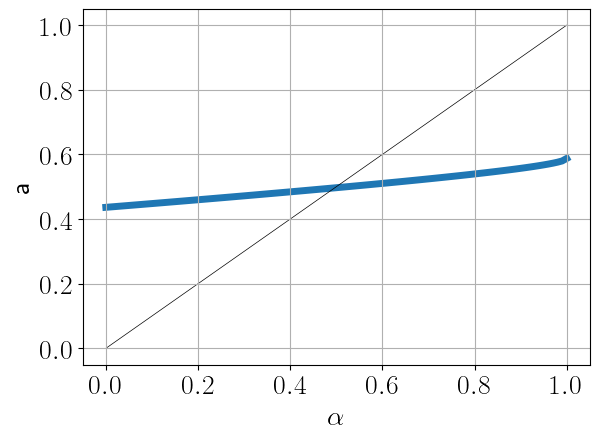

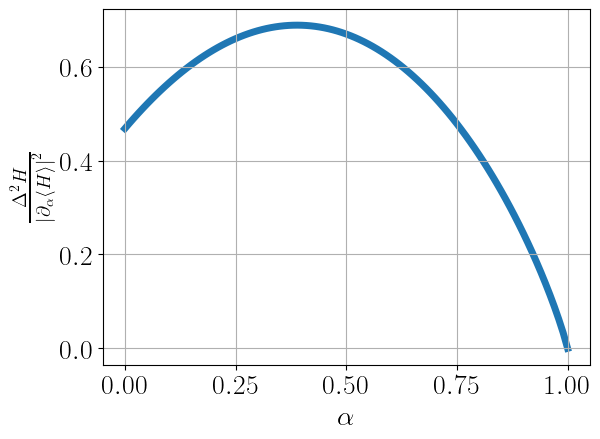

In [98]:
plt.plot(labels, expecs, linewidth=5, zorder=0)
plt.plot(labels, labels, color="black", linewidth=0.5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathsf{a}$")
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.plot(labels, disps/expecs_der**2, linewidth=5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\Delta^2 H}{\left| \partial_\alpha \langle H \rangle \right|^2}$" )
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

## Input $\rho = \frac{1}{2}\mathbb{1}$

In [167]:
def H_a(k, h0=0):
    return 4/(k + 8)*I + k/(k + 8)*Z

def rho_a(a):
    return (I + a*Z)/2

def rho_a_der(a):
    return Z/2

In [168]:
def expec_a(a, k):
    return (a*k + 4)/(k + 8)
    # return a*(k + 4)/(k + 8)

In [169]:
k = 1e0

a = 0
b = 1
eps = 1e-5
T = 101
labels = linspace(a + eps, b - eps, T)

dms = [rho_a(a) for a in labels]
dms_der = [rho_a_der(a) for a in labels]

H = H_a(k)

expecs = array([trace(dm@H).real for dm in dms])
# expecs = array([expec_a(a, k) for a in labels])
expecs_der = array([trace(dm_der@H).real for dm_der in dms_der])
disps = array([trace(dm@H@H).real for dm in dms]) - expecs**2

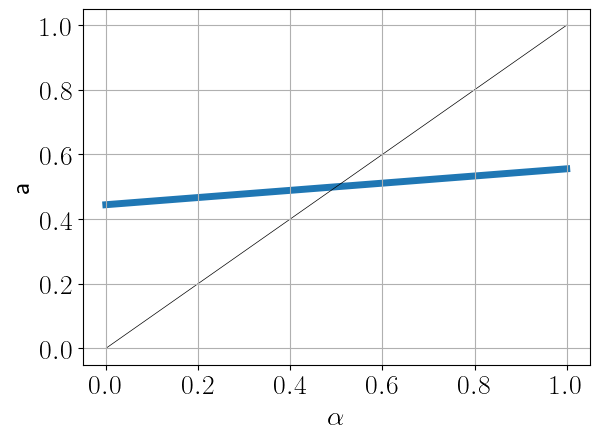

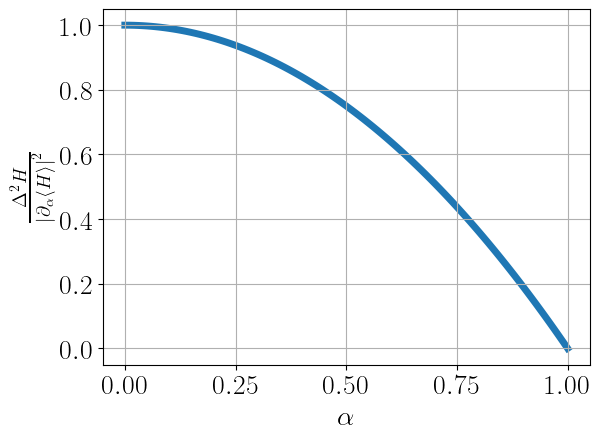

In [170]:
plt.plot(labels, expecs, linewidth=5, zorder=0)
plt.plot(labels, labels, color="black", linewidth=0.5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathsf{a}$")
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.plot(labels, disps/expecs_der**2, linewidth=5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\Delta^2 H}{\left| \partial_\alpha \langle H \rangle \right|^2}$" )
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

# Isotropic

In [68]:
def H_iso(k):
    return array([[4,     0,     0, k],
                  [0, 4 - k,     0, 0],
                  [0,     0, 4 - k, 0],
                  [k,     0,     0, 4]])/(8 + k)

def rho_iso(N):
    dm_bell = array([[1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1]])/2
    return (2*N + 1)/3*dm_bell + (1 - N)/6*eye(4)

def rho_iso_der(N):
    dm_bell = array([[1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1]])/2
    return 2/3*dm_bell + -1/6*eye(4)

In [66]:
k = 1e4

a = 0
b = 1
eps = 1e-5
T = 101
labels = linspace(a + eps, b - eps, T)

dms = [rho_iso(a) for a in labels]
dms_der = [rho_iso_der(a) for a in labels]

H = H_iso(k)

expecs = array([trace(dm@H).real for dm in dms])
expecs_der = array([trace(dm_der@H).real for dm_der in dms_der])
disps = array([trace(dm@H@H).real for dm in dms]) - expecs**2

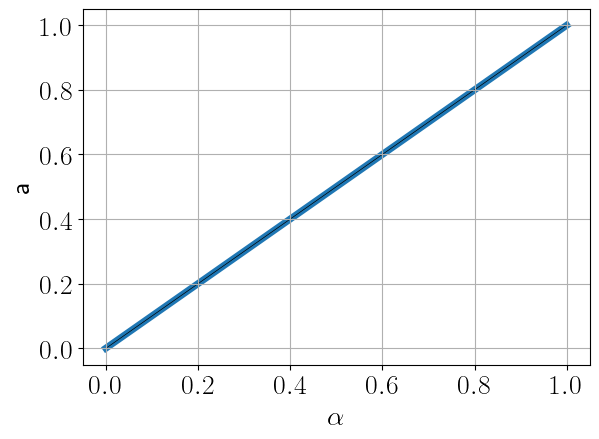

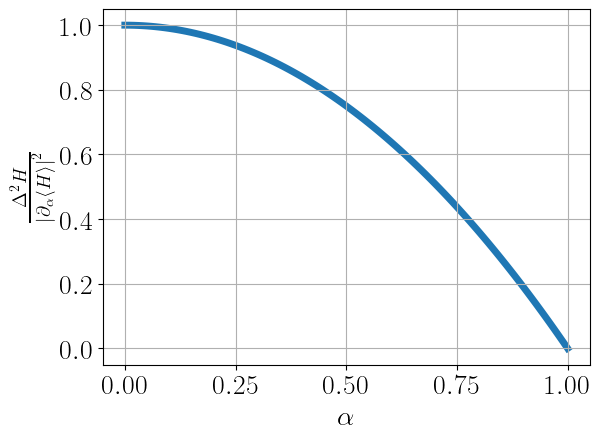

In [67]:
plt.plot(labels, expecs, linewidth=5, zorder=0)
plt.plot(labels, labels, color="black", linewidth=0.5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathsf{a}$")
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.plot(labels, disps/expecs_der**2, linewidth=5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\Delta^2 H}{\left| \partial_\alpha \langle H \rangle \right|^2}$" )
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

# Depolarizing for $|+\rangle$

In [70]:
def H_dep(k):
    return (3*k + 10)/(3*k + 15)*I - k/(k + 5)*X

def rho_dep(a):
    return 1/2*I + (1 - a)/2*X

def rho_dep_der(a):
    return 1/2*X

In [75]:
k = 1e0

a = 0
b = 4/3
eps = 1e-5
T = 101
labels = linspace(a + eps, b - eps, T)

dms = [rho_dep(a) for a in labels]
dms_der = [rho_dep_der(a) for a in labels]

H = H_dep(k)

expecs = array([trace(dm@H).real for dm in dms])
expecs_der = array([trace(dm_der@H).real for dm_der in dms_der])
disps = array([trace(dm@H@H).real for dm in dms]) - expecs**2

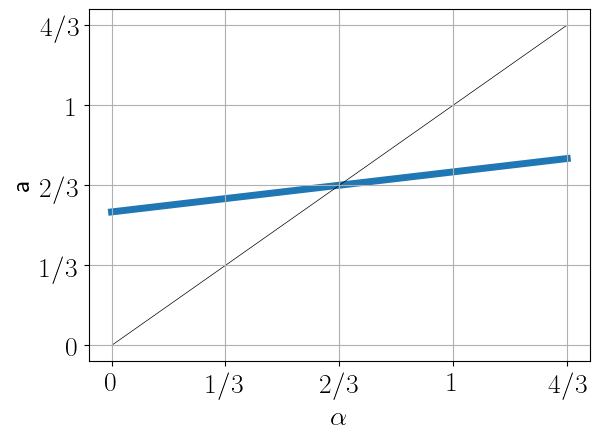

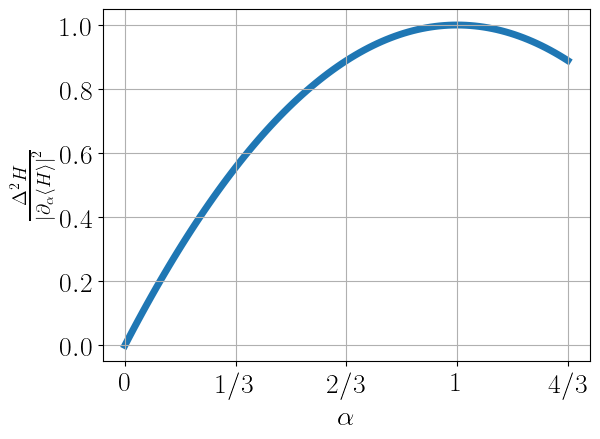

In [81]:
plt.plot(labels, expecs, linewidth=5, zorder=0)
plt.plot(labels, labels, color="black", linewidth=0.5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathsf{a}$")
# plt.xticks([0, 1/3, 2/3, 1, 4/3], [r"$0$", r"$\frac{1}{3}$", r"$\frac{2}{3}$", r"$1$", r"$\frac{4}{3}$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
plt.xticks([0, 1/3, 2/3, 1, 4/3], [r"$0$", r"$1/3$", r"$2/3$", r"$1$", r"$4/3$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
plt.yticks([0, 1/3, 2/3, 1, 4/3], [r"$0$", r"$1/3$", r"$2/3$", r"$1$", r"$4/3$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.plot(labels, disps/expecs_der**2, linewidth=5, zorder=0)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\Delta^2 H}{\left| \partial_\alpha \langle H \rangle \right|^2}$" )
plt.xticks([0, 1/3, 2/3, 1, 4/3], [r"$0$", r"$1/3$", r"$2/3$", r"$1$", r"$4/3$"]) # plt.xticks([i*pi/(4) for i in range(5)], [r"$" + str(i) + "\pi$" for i in range(5)])
plt.grid()
plt.tight_layout()
# plt.savefig(save_path + file_info + "-est.pdf", transparent=True, bbox_inches='tight')
plt.show()